In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,LSTM,Dense

In [2]:
batch_size=64 # batch size for training
epochs=200# number of epochs for training
latent_dim=256 # units of LSTM
num_samples=25000

In [3]:
data_path="C:/Users/LENOVO/Desktop/Files/symbi/Resume_projects/Nmt/deu-eng/deu.txt"

In [4]:
input_texts=[]
target_texts=[]
input_characters=set()
target_characters=set()

In [5]:
with open(data_path,'r',encoding='utf-8') as f:
    lines=f.read().split('\n')

In [6]:
len(lines)

255818

In [7]:
for line in lines[:min(num_samples,len(lines)-1)]:
    input_text,target_text,_=line.split('\t')
    target_text='\t'+ target_text+ '\n' # \t for start and \n for end
    input_texts.append(input_text)
    target_texts.append(target_text)
    for char in input_text:
        if char not in input_characters:
            input_characters.add(char)
    for char in target_text:
        if char not in target_characters:
            target_characters.add(char)

In [8]:
input_texts

['Go.',
 'Hi.',
 'Hi.',
 'Run!',
 'Run.',
 'Wow!',
 'Wow!',
 'Duck!',
 'Fire!',
 'Help!',
 'Help!',
 'Stay.',
 'Stop!',
 'Stop!',
 'Wait!',
 'Wait.',
 'Begin.',
 'Do it.',
 'Do it.',
 'Go on.',
 'Hello!',
 'Hello!',
 'Hurry!',
 'Hurry!',
 'I hid.',
 'I hid.',
 'I ran.',
 'I see.',
 'I see.',
 'I try.',
 'I try.',
 'I won!',
 'I won!',
 'I won.',
 'Oh no!',
 'Relax.',
 'Shoot!',
 'Shoot!',
 'Smile.',
 'Sorry?',
 'Ask me.',
 'Ask me.',
 'Ask me.',
 'Attack!',
 'Attack!',
 'Buy it.',
 'Cheers!',
 'Eat it.',
 'Eat up.',
 'Eat up.',
 'Eat up.',
 'Freeze!',
 'Freeze!',
 'Go now.',
 'Got it!',
 'Got it!',
 'Got it!',
 'Got it?',
 'Got it?',
 'Got it?',
 'He ran.',
 'He ran.',
 'Hop in.',
 'Hop in.',
 'Hug me.',
 'Hug me.',
 'Hug me.',
 'I care.',
 'I fell.',
 'I fell.',
 'I fell.',
 'I fell.',
 'I fell.',
 'I fled.',
 'I fled.',
 'I know.',
 'I lied.',
 'I lost.',
 'I paid.',
 'I paid.',
 'I sang.',
 'I spit.',
 'I spit.',
 'I swim.',
 'I wept.',
 'I wept.',
 "I'm 19.",
 "I'm 19.",
 "I'm OK."

In [9]:

print(len(input_characters))

71


In [10]:
input_characters

{' ',
 '!',
 '"',
 '$',
 '%',
 "'",
 ',',
 '-',
 '.',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 '?',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'Y',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z'}

In [11]:
target_texts

['\tGeh.\n',
 '\tHallo!\n',
 '\tGrüß Gott!\n',
 '\tLauf!\n',
 '\tLauf!\n',
 '\tPotzdonner!\n',
 '\tDonnerwetter!\n',
 '\tKopf runter!\n',
 '\tFeuer!\n',
 '\tHilfe!\n',
 '\tZu Hülf!\n',
 '\tBleib!\n',
 '\tStopp!\n',
 '\tAnhalten!\n',
 '\tWarte!\n',
 '\tWarte.\n',
 '\tFang an.\n',
 '\tMache es!\n',
 '\tTue es.\n',
 '\tMach weiter.\n',
 '\tHallo!\n',
 '\tSers!\n',
 '\tBeeil dich!\n',
 '\tSchnell!\n',
 '\tIch versteckte mich.\n',
 '\tIch habe mich versteckt.\n',
 '\tIch rannte.\n',
 '\tIch verstehe.\n',
 '\tAha.\n',
 '\tIch versuche es.\n',
 '\tIch probiere es.\n',
 '\tIch hab gewonnen!\n',
 '\tIch habe gewonnen!\n',
 '\tIch habe gewonnen.\n',
 '\tOh, Nein!\n',
 '\tEntspann dich.\n',
 '\tFeuer!\n',
 '\tSchieß!\n',
 '\tLächeln!\n',
 '\tEntschuldigung?\n',
 '\tFrag mich!\n',
 '\tFragt mich!\n',
 '\tFragen Sie mich!\n',
 '\tAngriff!\n',
 '\tAttacke!\n',
 '\tKauf’s!\n',
 '\tZum Wohl!\n',
 '\tIss es.\n',
 '\tIss fertig!\n',
 '\tIss auf.\n',
 '\tIss auf!\n',
 '\tKeine Bewegung!\n',
 '\tStehenble

In [12]:
target_characters

{'\t',
 '\n',
 ' ',
 '!',
 '"',
 '$',
 '%',
 "'",
 ',',
 '-',
 '.',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 '?',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'Y',
 'Z',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '\xa0',
 'Ä',
 'Ö',
 'Ü',
 'ß',
 'ä',
 'é',
 'ö',
 'ü',
 'ō',
 '–',
 '—',
 '’',
 '“',
 '„',
 '\u202f'}

In [13]:
len(target_characters)

90

In [14]:
type(input_characters)

set

In [15]:
input_characters=sorted(list(input_characters))
target_characters=sorted(list(target_characters))
num_encoder_tokens=len(input_characters) 
num_decoder_tokens=len(target_characters)
max_encoder_seq_length=max([len(txt) for txt in input_texts])
max_decoder_seq_length=max([len(txt) for txt in target_texts])

In [16]:
print('Number of samples : ',len(input_texts))
print('Number of unique input tokens : ',num_encoder_tokens)
print('Number of unique output tokens : ',num_decoder_tokens)
print('Max sequence length for inputs : ',max_encoder_seq_length)
print('Max sequence length for outputs : ',max_decoder_seq_length)

Number of samples :  25000
Number of unique input tokens :  71
Number of unique output tokens :  90
Max sequence length for inputs :  18
Max sequence length for outputs :  74


In [17]:
input_token_index=dict(
[(char,i) for i,char in enumerate(input_characters)])
target_token_index=dict(
[(char,i) for i,char in enumerate(target_characters)])

In [18]:
input_token_index,target_token_index

({' ': 0,
  '!': 1,
  '"': 2,
  '$': 3,
  '%': 4,
  "'": 5,
  ',': 6,
  '-': 7,
  '.': 8,
  '0': 9,
  '1': 10,
  '2': 11,
  '3': 12,
  '4': 13,
  '5': 14,
  '6': 15,
  '7': 16,
  '8': 17,
  '9': 18,
  ':': 19,
  '?': 20,
  'A': 21,
  'B': 22,
  'C': 23,
  'D': 24,
  'E': 25,
  'F': 26,
  'G': 27,
  'H': 28,
  'I': 29,
  'J': 30,
  'K': 31,
  'L': 32,
  'M': 33,
  'N': 34,
  'O': 35,
  'P': 36,
  'Q': 37,
  'R': 38,
  'S': 39,
  'T': 40,
  'U': 41,
  'V': 42,
  'W': 43,
  'Y': 44,
  'a': 45,
  'b': 46,
  'c': 47,
  'd': 48,
  'e': 49,
  'f': 50,
  'g': 51,
  'h': 52,
  'i': 53,
  'j': 54,
  'k': 55,
  'l': 56,
  'm': 57,
  'n': 58,
  'o': 59,
  'p': 60,
  'q': 61,
  'r': 62,
  's': 63,
  't': 64,
  'u': 65,
  'v': 66,
  'w': 67,
  'x': 68,
  'y': 69,
  'z': 70},
 {'\t': 0,
  '\n': 1,
  ' ': 2,
  '!': 3,
  '"': 4,
  '$': 5,
  '%': 6,
  "'": 7,
  ',': 8,
  '-': 9,
  '.': 10,
  '0': 11,
  '1': 12,
  '2': 13,
  '3': 14,
  '4': 15,
  '5': 16,
  '6': 17,
  '7': 18,
  '8': 19,
  '9': 20,
  ':'

In [19]:
# as per https://blog.keras.io/a-ten-minute-introduction-to-sequence-to-sequence-learning-in-keras.html
import numpy as np
encoder_input_data=np.zeros(
    (len(input_texts),max_encoder_seq_length,num_encoder_tokens),
    dtype='float32')
decoder_input_data=np.zeros(
    (len(input_texts),max_decoder_seq_length,num_decoder_tokens),
    dtype='float32')
decoder_target_data=np.zeros(
    (len(input_texts),max_decoder_seq_length,num_decoder_tokens),
    dtype='float32')

In [20]:
# converting into one-hot for lstm
for i,(input_text,target_text) in enumerate(zip(input_texts,target_texts)):
    for t,char in enumerate(input_text):
        encoder_input_data[i,t,input_token_index[char]]=1.
    encoder_input_data[i,t+1:,input_token_index[' ']]=1.
    for t,char in enumerate(target_text):
        decoder_input_data[i,t,target_token_index[char]]=1.
        if t>0:
            decoder_target_data[i,t-1,target_token_index[char]]=1
    decoder_input_data[i,t+1:,target_token_index[' ']]=1.
    decoder_target_data[i,t:,target_token_index[' ']]=1.

In [21]:
encoder_input_data.shape

(25000, 18, 71)

In [22]:
decoder_input_data.shape

(25000, 74, 90)

In [23]:
decoder_target_data.shape

(25000, 74, 90)

In [24]:
# Define an input sequence and process it.
encoder_inputs = Input(shape=(None, num_encoder_tokens))
encoder = LSTM(latent_dim, return_state=True,dropout=0.3) # before dropout model was overfitting val loss was >40% with training
# accuracy 82% hence added dropout of 0.3 to reduce overfitting now got val loss approx 28%
encoder_outputs, state_h, state_c = encoder(encoder_inputs)
# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]

In [25]:
# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None, num_decoder_tokens))
# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the 
# return states in the training model, but we will use them in inference.
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.3)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs,
                                     initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

In [26]:
# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
# Run training
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')
model.fit([encoder_input_data, decoder_input_data], decoder_target_data,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2)

Epoch 1/200
313/313 [==============================] - 12s 19ms/step - loss: 0.8540 - val_loss: 0.6831
Epoch 2/200
313/313 [==============================] - 5s 16ms/step - loss: 0.5884 - val_loss: 0.5709
Epoch 3/200
313/313 [==============================] - 5s 16ms/step - loss: 0.5315 - val_loss: 0.5164
Epoch 4/200
313/313 [==============================] - 5s 17ms/step - loss: 0.4942 - val_loss: 0.4798
Epoch 5/200
313/313 [==============================] - 5s 17ms/step - loss: 0.4697 - val_loss: 0.4567
Epoch 6/200
313/313 [==============================] - 6s 18ms/step - loss: 0.4513 - val_loss: 0.4441
Epoch 7/200
313/313 [==============================] - 5s 17ms/step - loss: 0.4359 - val_loss: 0.4276
Epoch 8/200
313/313 [==============================] - 5s 17ms/step - loss: 0.4234 - val_loss: 0.4121
Epoch 9/200
313/313 [==============================] - 5s 17ms/step - loss: 0.4124 - val_loss: 0.3961
Epoch 10/200
313/313 [==============================] - 6s 18ms/step - loss: 0.40

313/313 [==============================] - 6s 21ms/step - loss: 0.2081 - val_loss: 0.2886
Epoch 160/200
313/313 [==============================] - 6s 20ms/step - loss: 0.2066 - val_loss: 0.2992
Epoch 161/200
313/313 [==============================] - 6s 20ms/step - loss: 0.2074 - val_loss: 0.2885
Epoch 162/200
313/313 [==============================] - 6s 19ms/step - loss: 0.2064 - val_loss: 0.2918
Epoch 163/200
313/313 [==============================] - 6s 19ms/step - loss: 0.2064 - val_loss: 0.2883
Epoch 164/200
313/313 [==============================] - 6s 20ms/step - loss: 0.2067 - val_loss: 0.2898
Epoch 165/200
313/313 [==============================] - 6s 20ms/step - loss: 0.2066 - val_loss: 0.2913
Epoch 166/200
313/313 [==============================] - 6s 19ms/step - loss: 0.2063 - val_loss: 0.2895
Epoch 167/200
313/313 [==============================] - 6s 19ms/step - loss: 0.2054 - val_loss: 0.2883
Epoch 168/200
313/313 [==============================] - 6s 19ms/step - loss: 

In [27]:
encoder_model = Model(encoder_inputs, encoder_states)

decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_outputs, state_h, state_c = decoder_lstm(
    decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs] + decoder_states)

reverse_input_char_index=dict(
(char,i) for i,char in input_token_index.items())
reverse_target_char_index=dict(
(char,i) for i,char in target_token_index.items())

In [28]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)

    target_seq = np.zeros((1, 1, num_decoder_tokens))
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0, target_token_index['\t']] = 1.

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict(
            [target_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += sampled_char

        # Exit condition: either hit max length
        # or find stop character.
        if (sampled_char == '\n' or
           len(decoded_sentence) > max_decoder_seq_length):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1, num_decoder_tokens))
        target_seq[0, 0, sampled_token_index] = 1.

        # Update states
        states_value = [h, c]

    return decoded_sentence

In [29]:
for seq_index in range(0,50):
    input_seq=encoder_input_data[seq_index:seq_index+1]
    decoded_sentence=decode_sequence(input_seq)
    print('-')
    print('Input sentence : ',input_texts[seq_index])
    print('Decoded sentence : ',decoded_sentence)

-
Input sentence :  Go.
Decoded sentence :  Geh.

-
Input sentence :  Hi.
Decoded sentence :  Hallo!

-
Input sentence :  Hi.
Decoded sentence :  Hallo!

-
Input sentence :  Run!
Decoded sentence :  Lauf!

-
Input sentence :  Run.
Decoded sentence :  Lauf!

-
Input sentence :  Wow!
Decoded sentence :  Potzertrecht!

-
Input sentence :  Wow!
Decoded sentence :  Potzertrecht!

-
Input sentence :  Duck!
Decoded sentence :  Kopf runter!

-
Input sentence :  Fire!
Decoded sentence :  Fengel!

-
Input sentence :  Help!
Decoded sentence :  Hilfo!

-
Input sentence :  Help!
Decoded sentence :  Hilfo!

-
Input sentence :  Stay.
Decoded sentence :  Bleib!

-
Input sentence :  Stop!
Decoded sentence :  Anhalten!

-
Input sentence :  Stop!
Decoded sentence :  Anhalten!

-
Input sentence :  Wait!
Decoded sentence :  Warte!

-
Input sentence :  Wait.
Decoded sentence :  Warte!

-
Input sentence :  Begin.
Decoded sentence :  Fang an!

-
Input sentence :  Do it.
Decoded sentence :  Mache still!

-
Inp

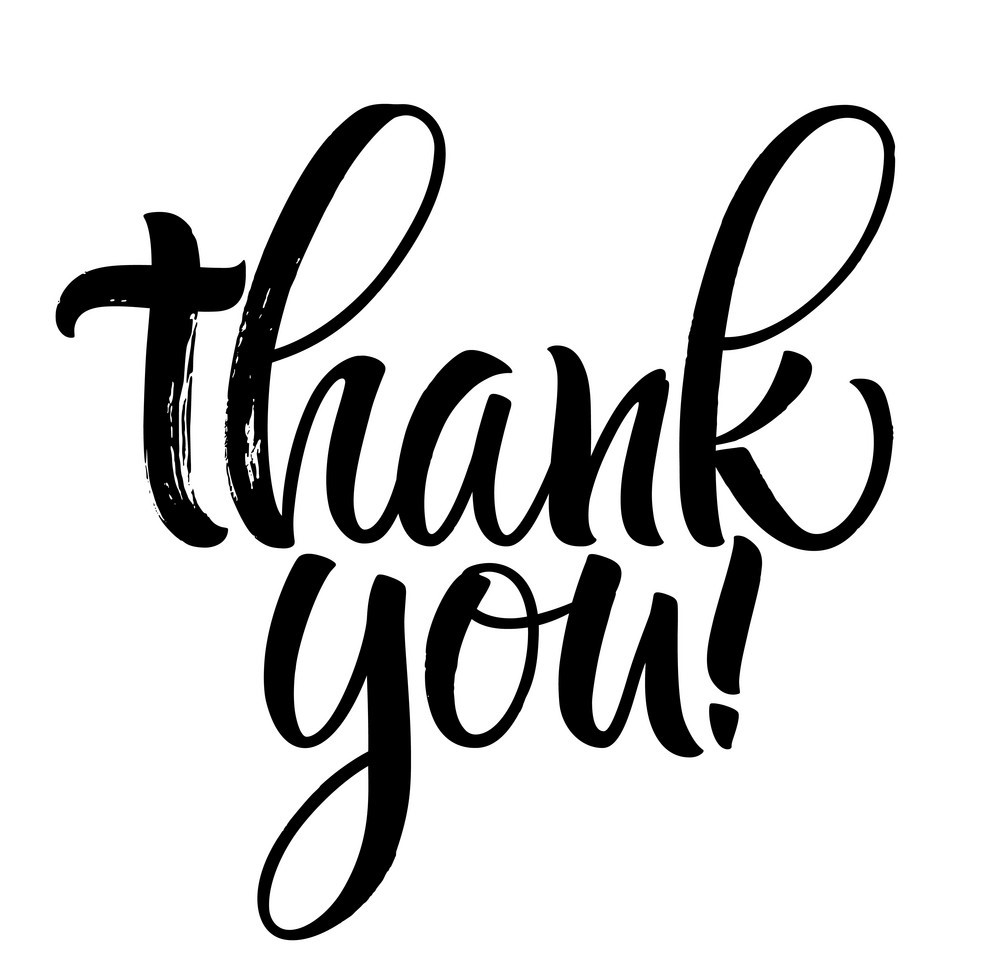